In [1]:
import pandas as pd

In [47]:
import numpy as np 
import random

df2 = pd.read_csv('kddcup.data.txt', header=None, on_bad_lines='skip')
np.random.seed(42)

# Ustawienie ziarna dla czystego Pythona (rzadziej potrzebne w ML, ale warto)
random.seed(42)

df2.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [48]:
df2[41].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [49]:
df2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898430 entries, 0 to 4898429
Data columns (total 42 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       4898430 non-null  int64  
 1   1       4898430 non-null  object 
 2   2       4898430 non-null  object 
 3   3       4898430 non-null  object 
 4   4       4898430 non-null  int64  
 5   5       4898430 non-null  int64  
 6   6       4898430 non-null  int64  
 7   7       4898430 non-null  int64  
 8   8       4898430 non-null  int64  
 9   9       4898430 non-null  int64  
 10  10      4898430 non-null  int64  
 11  11      4898430 non-null  int64  
 12  12      4898430 non-null  int64  
 13  13      4898430 non-null  int64  
 14  14      4898430 non-null  int64  
 15  15      4898430 non-null  int64  
 16  16      4898430 non-null  int64  
 17  17      4898430 non-null  int64  
 18  18      4898430 non-null  int64  
 19  19      4898430 non-null  int64  
 20  20      4898430 non-null

In [50]:
# removing the dot
df2[41] = df2[41].astype(str).str.rstrip('.')

# 0=Normal, 1=DoS, 2=Probe, 3=R2L, 4=U2R
attack_map = {
    'normal': 0,
    
    # DOS (1)
    'back': 1, 'land': 1, 'neptune': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,
    'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1,
    
    # PROBE (2)
    'ipsweep': 2, 'nmap': 2, 'portsweep': 2, 'satan': 2,
    'mscan': 2, 'saint': 2, 
    
    # R2L (3)
    'ftp_write': 3, 'guess_passwd': 3, 'imap': 3, 'multihop': 3, 'phf': 3,
    'spy': 3, 'warezclient': 3, 'warezmaster': 3,
    'sendmail': 3, 'named': 3, 'snmpgetattack': 3, 'snmpguess': 3, 'xlock': 3, 'xsnoop': 3, 'worm': 3, #
    
    # U2R (4)
    'buffer_overflow': 4, 'loadmodule': 4, 'perl': 4, 'rootkit': 4,
    'httptunnel': 4, 'ps': 4, 'sqlattack': 4, 'xterm': 4 
}

protocols_map = {
    'tcp': 0,
    'udp': 1,
    'icmp': 2
}

service_map = {
    'auth': 0, 'bgp': 1, 'courier': 2, 'csnet_ns': 3, 'ctf': 4,
    'daytime': 5, 'discard': 6, 'domain': 7, 'domain_u': 8, 'echo': 9,
    'eco_i': 10, 'ecr_i': 11, 'efs': 12, 'exec': 13, 'finger': 14,
    'ftp': 15, 'ftp_data': 16, 'gopher': 17, 'hostnames': 18, 'http': 19,
    'http_443': 20, 'imap4': 21, 'IRC': 22, 'iso_tsap': 23, 'klogin': 24,
    'kshell': 25, 'ldap': 26, 'link': 27, 'login': 28, 'mtp': 29,
    'name': 30, 'netbios_dgm': 31, 'netbios_ns': 32, 'netbios_ssn': 33,
    'netstat': 34, 'nnsp': 35, 'nntp': 36, 'ntp_u': 37, 'other': 38,
    'pm_dump': 39, 'pop_2': 40, 'pop_3': 41, 'printer': 42, 'private': 43,
    'red_i': 44, 'remote_job': 45, 'rje': 46, 'shell': 47, 'smtp': 48,
    'sql_net': 49, 'ssh': 50, 'sunrpc': 51, 'supdup': 52, 'systat': 53,
    'telnet': 54, 'tftp_u': 55, 'tim_i': 56, 'time': 57, 'urh_i': 58,
    'urp_i': 59, 'uucp': 60, 'uucp_path': 61, 'vmnet': 62, 'whois': 63,
    'X11': 64, 'Z39_50': 65
}

flag_map = {
    'SF': 0,        # Normalne połączenie (SYN-ACK-FIN)
    'S0': 1,        # Próba połączenia (tylko SYN, brak odpowiedzi)
    'S1': 2,        # Połączenie nawiązane, nie zamknięte
    'S2': 3,        # Nawiązane, próba zamknięcia przez inicjatora
    'S3': 4,        # Nawiązane, próba zamknięcia przez odbiorcę
    'OTH': 5,       # Ruch w środku połączenia (brak SYN)
    'REJ': 6,       # Połączenie odrzucone (RST)
    'RSTO': 7,      # Reset przez inicjatora
    'RSTR': 8,      # Reset przez odbiorcę
    'RSTOS0': 9,    # Inicjator wysłał SYN, potem RST
    'SH': 10        # Inicjator wysłał SYN, potem FIN (skanowanie?)
}

# Mapujemy usługi i flagi
df2[1] = df2[1].map(protocols_map)
df2[2] = df2[2].map(service_map)
df2[3] = df2[3].map(flag_map)
df2[41] = df2[41].map(attack_map)

# Ważne: Jeśli w danych pojawi się coś nowego (spoza listy), map wstawi tam NaN.
# Warto wypełnić te luki wartością np. -1 (jako "nieznane")
df2[1] = df2[1].fillna(-1).astype(int)
df2[2] = df2[2].fillna(-1).astype(int)
df2[3] = df2[3].fillna(-1).astype(int)
df2[41] = df2[41].fillna(-1).astype(int)





# Sprawdzenie wyniku
#print(df2['category_num'].value_counts())
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,19,0,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,0,19,0,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0
2,0,0,19,0,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0
3,0,0,19,0,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,0
4,0,0,19,0,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0


In [51]:
X = df2.drop(columns=[41])
y = df2[41]

In [52]:
# 0=Normal, 1=DoS, 2=Probe, 3=R2L, 4=U2R
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.ensemble import RandomForestClassifier
import joblib # Do zapisywania modeli
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

attack_types = {
    1: 'DoS',
    2: 'Probe',
    3: 'R2L',
    4: 'U2R'
}

results = {} # Tu będziemy zbierać wyniki

# Pętla po każdym typie ataku
for attack_id, attack_name in attack_types.items():
    print(f"--- Trenowanie modelu: Normal vs {attack_name} ---")
    
    # 1. Przygotowanie danych (Tylko Normal + Ten konkretny atak)
    target_classes = [0, attack_id]
    train_mask = y_train.isin(target_classes)
    
    X_train_special = X_train[train_mask]
    y_train_special = y_train[train_mask]
    
    rf = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced')
    rf.fit(X_train_special, y_train_special)
    
    # 3. Zapisywanie modelu (opcjonalne, ale zalecane)
    filename = f'model_rf_normal_vs_{attack_name}.joblib'
    joblib.dump(rf, filename)
    print(f"Model zapisano jako {filename}")

    # 4. Testowanie na PEŁNYM zbiorze (wszystkie ataki)
    y_pred = rf.predict(X_test)
    
    
    cm = confusion_matrix(y_test, y_pred)
    
    # Wycinamy tylko 2 pierwsze kolumny (bo model przewiduje tylko 0 i 1)
    # 0 = Normal, 1 = Atak (według tego modelu)
    # Ponieważ attack_id w y_train to np. 3, a nie 1, musimy uważać.
    # Ale RandomForest zwróci etykiety takie, jakie dostał na wejściu (czyli 0 i attack_id).
    
    # Uwaga techniczna: Model zwróci predykcje [0, attack_id].
    # Aby ujednolicić wyniki w tabeli, potraktujmy drugą kolumnę jako ogólne "Wykryto Atak/Anomalię"
    
    # Zmapujmy predykcje modelu na 0 i 1 (gdzie 1 to "jakikolwiek atak")
    # Żeby macierze były porównywalne
    y_pred_binary = (y_pred != 0).astype(int) 
    
    
    cm_final = pd.crosstab(
        y_test, 
        y_pred_binary, 
        rownames=['Prawdziwa Klasa'], 
        colnames=[f'Decyzja Modelu ({attack_name})']
    )

    model_labels = {
        0: 'Normal', 
        1: f'Alarm: {attack_name}'
    }
    
    # 3. ZMIENIAMY NAZWY W TABELI
    cm_readable = cm_final.rename(index=attack_types, columns=model_labels)
    
    # Zapisz wynik
    results[attack_name] = cm_final
    
    print(cm_readable)
    print("\n")

--- Trenowanie modelu: Normal vs DoS ---
Model zapisano jako model_rf_normal_vs_DoS.joblib
Decyzja Modelu (DoS)  Normal  Alarm: DoS
Prawdziwa Klasa                         
0                     194360           4
DoS                        5      776812
Probe                   4760        3514
R2L                      218           0
U2R                       13           0


--- Trenowanie modelu: Normal vs Probe ---
Model zapisano jako model_rf_normal_vs_Probe.joblib
Decyzja Modelu (Probe)  Normal  Alarm: Probe
Prawdziwa Klasa                             
0                       194361             3
DoS                     661928        114889
Probe                       14          8260
R2L                        218             0
U2R                         13             0


--- Trenowanie modelu: Normal vs R2L ---
Model zapisano jako model_rf_normal_vs_R2L.joblib
Decyzja Modelu (R2L)  Normal  Alarm: R2L
Prawdziwa Klasa                         
0                     194362       

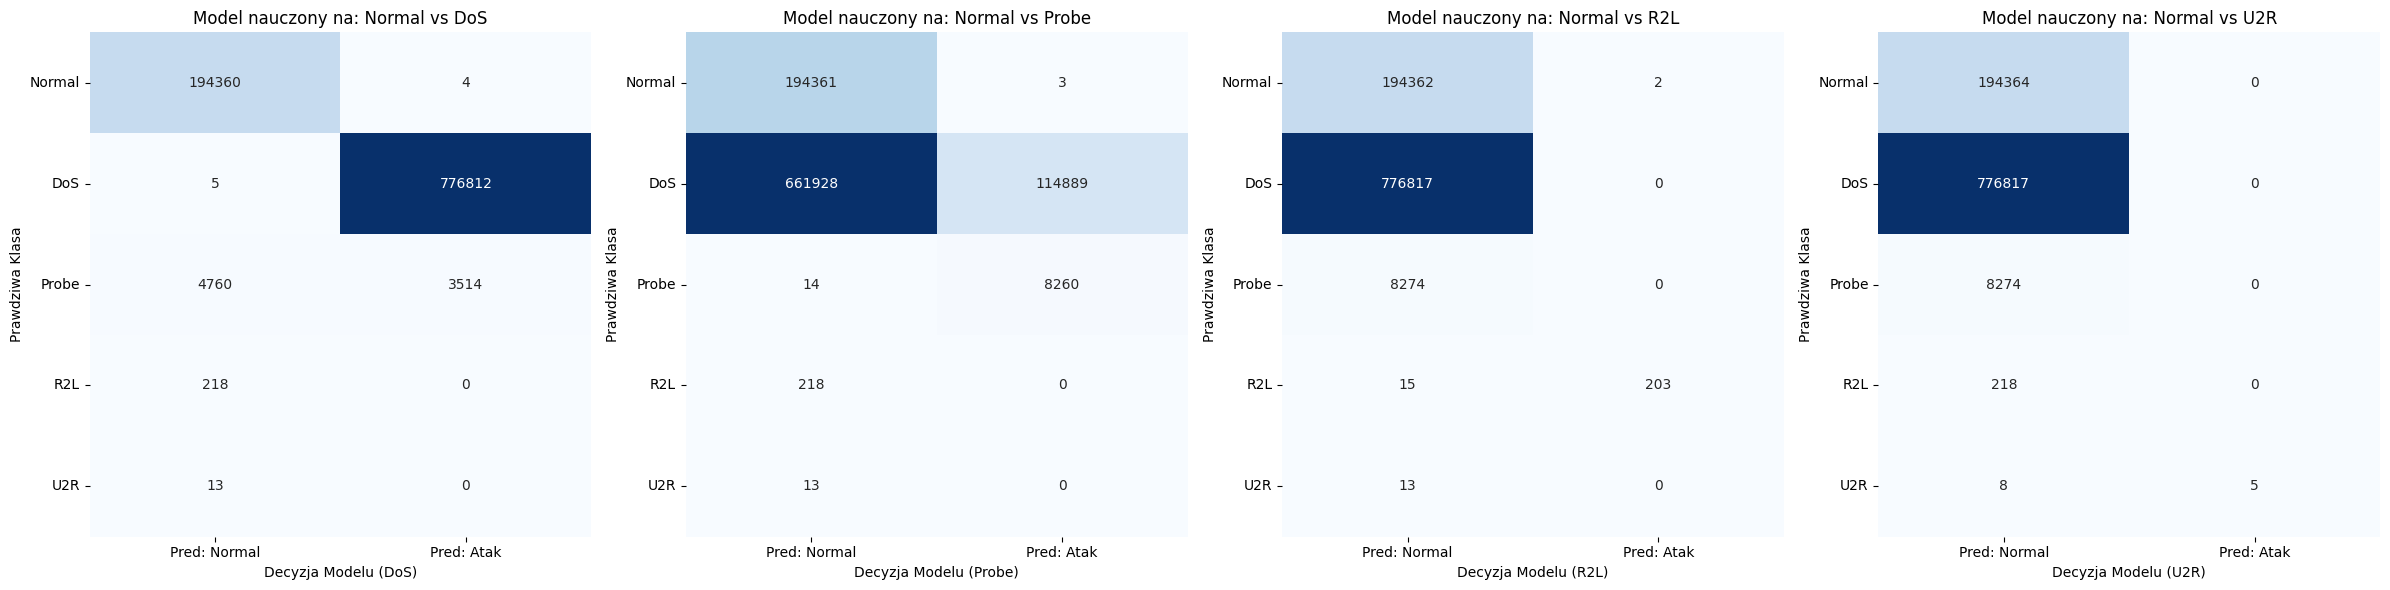

In [54]:
import seaborn as sns
# Rysowanie 4 heatmap obok siebie
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

classes_all_names = ['Normal', 'DoS', 'Probe', 'R2L', 'U2R']

for i, (attack_name, df_cm) in enumerate(results.items()):
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(f'Model nauczony na: Normal vs {attack_name}')
    axes[i].set_yticklabels(classes_all_names, rotation=0)
    axes[i].set_xticklabels(['Pred: Normal', 'Pred: Atak'])

plt.tight_layout()
plt.show()

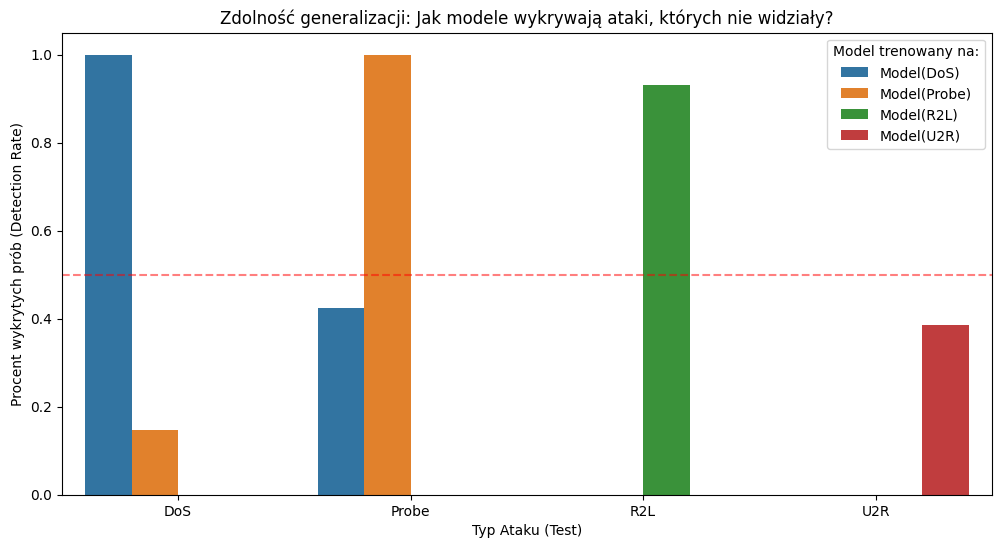

In [56]:
# Przygotowanie danych do wykresu zbiorczego
summary_data = []

for model_name, cm in results.items():
    # cm to DataFrame, indeksy to 0,1,2,3,4
    for real_class_id in [1, 2, 3, 4]: # Pomijamy Normal (0)
        total = cm.loc[real_class_id].sum()
        detected = cm.loc[real_class_id, 1] # Kolumna 1 to "Wykryto atak"
        accuracy = detected / total
        
        real_class_name = classes_all_names[real_class_id]
        
        summary_data.append({
            'Model': f'Model({model_name})',
            'Typ Ataku (Test)': real_class_name,
            'Wykrywalność': accuracy
        })

df_plot = pd.DataFrame(summary_data)

# Rysowanie
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Typ Ataku (Test)', y='Wykrywalność', hue='Model')
plt.title('Zdolność generalizacji: Jak modele wykrywają ataki, których nie widziały?')
plt.ylabel('Procent wykrytych prób (Detection Rate)')
plt.ylim(0, 1.05)
plt.axhline(0.5, color='red', linestyle='--', alpha=0.5) # Linia 50%
plt.legend(title='Model trenowany na:', loc='upper right')
plt.show()